The following Jupyter Notebook is intended to compare the Django-processed leaderboard and the Materialized View-processed leaderboard.

The datasets for comparison is the CSV download as this should contain all publically visible scores.

In [1]:
import pandas as pd
import numpy as np

In [2]:
old_leaderboard = pd.read_csv("old_leaderboard.csv")
new_leaderboard = pd.read_csv("new_leaderboard.csv")


In [3]:
# Compare the two leaderboards
old_leaderboard.head()

,model_name,model_id,rank,average_vision,neural_vision,V1,tong.Coggan2024_fMRI.V1-rdm,FreemanZiemba2013.V1-pls,Marques2020,V1-orientation,...,Geirhos2021phasescrambling-top1,Geirhos2021powerequalisation-top1,Geirhos2021rotation-top1,Geirhos2021silhouette-top1,Geirhos2021sketch-top1,Geirhos2021stylized-top1,Geirhos2021uniformnoise-top1,Hermann2020,Hermann2020cueconflict-shape_match,Hermann2020cueconflict-shape_bias
0,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,2330,1,.467,.378,.334,.025,.269,.707,.869,...,.856,.959,.960,.719,.940,.588,.750,.319,.277,.360
1,convnext_xlarge:fb_in22k_ft_in1k,2332,2,.449,.338,.307,.007,.222,.691,.876,...,.833,.943,.904,.669,.879,.631,.776,.372,.331,.412
2,vit_base_patch16_clip_224:openai_ft_in12k_in1k,2335,3,.445,.343,.379,.224,.234,.680,.822,...,.800,.914,.882,.625,.869,.609,.701,.353,.293,.412
3,vit_large_patch14_clip_224:laion2b_ft_in1k,2340,4,.445,.332,.336,.086,.219,.705,.799,...,.844,.939,.951,.725,.946,.649,.670,.362,.314,.410
4,vit_large_patch14_clip_224:openai_ft_in1k,2342,5,.443,.341,.370,.176,.259,.676,.744,...,.892,.964,.964,.719,.958,.637,.821,.386,.339,.432


In [4]:
new_leaderboard.head()

,model_name,model_id,rank,layers,average_vision,neural_vision,V1,FreemanZiemba2013.V1-pls,Marques2020,V1-orientation,...,Geirhos2021phasescrambling-top1,Geirhos2021powerequalisation-top1,Geirhos2021rotation-top1,Geirhos2021silhouette-top1,Geirhos2021sketch-top1,Geirhos2021stylized-top1,Geirhos2021uniformnoise-top1,Hermann2020,Hermann2020cueconflict-shape_bias,Hermann2020cueconflict-shape_match
0,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,2330,1,"{""IT"": ""stages.2.blocks.4.conv_dw"", ""V1"": ""sta...",.467,.378,.334,.269,.707,.869,...,0.856,0.959,0.960,0.719,0.940,0.588,0.750,.319,0.360,0.277
1,convnext_xlarge:fb_in22k_ft_in1k,2332,2,"{""IT"": ""stages.2.blocks.1.conv_dw"", ""V1"": ""sta...",.449,.338,.307,.222,.691,.876,...,0.833,0.943,0.904,0.669,0.879,0.631,0.776,.372,0.412,0.331
2,vit_base_patch16_clip_224:openai_ft_in12k_in1k,2335,3,"{""IT"": ""blocks.6.norm2"", ""V1"": ""blocks.2.attn""...",.445,.343,.379,.234,.680,.822,...,0.800,0.914,0.882,0.625,0.869,0.609,0.701,.353,0.412,0.293
3,vit_large_patch14_clip_224:laion2b_ft_in1k,2340,3,"{""IT"": ""blocks.9.attn"", ""V1"": ""blocks.4.attn.q...",.445,.332,.336,.219,.705,.799,...,0.844,0.939,0.951,0.725,0.946,0.649,0.670,.362,0.410,0.314
4,vit_large_patch14_clip_224:openai_ft_in1k,2342,4,"{""IT"": ""blocks.10.attn"", ""V1"": ""blocks.6"", ""V2...",.443,.341,.370,.259,.676,.744,...,0.892,0.964,0.964,0.719,0.958,0.637,0.821,.386,0.432,0.339


The new leaderboard CSV file contains layer information. Let's remove that.

In [5]:
new_leaderboard.drop(columns=["layers"], inplace=True)
new_leaderboard.head()

,model_name,model_id,rank,average_vision,neural_vision,V1,FreemanZiemba2013.V1-pls,Marques2020,V1-orientation,Marques2020_DeValois1982-pref_or,...,Geirhos2021phasescrambling-top1,Geirhos2021powerequalisation-top1,Geirhos2021rotation-top1,Geirhos2021silhouette-top1,Geirhos2021sketch-top1,Geirhos2021stylized-top1,Geirhos2021uniformnoise-top1,Hermann2020,Hermann2020cueconflict-shape_bias,Hermann2020cueconflict-shape_match
0,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,2330,1,.467,.378,.334,.269,.707,.869,.930,...,0.856,0.959,0.960,0.719,0.940,0.588,0.750,.319,0.360,0.277
1,convnext_xlarge:fb_in22k_ft_in1k,2332,2,.449,.338,.307,.222,.691,.876,.923,...,0.833,0.943,0.904,0.669,0.879,0.631,0.776,.372,0.412,0.331
2,vit_base_patch16_clip_224:openai_ft_in12k_in1k,2335,3,.445,.343,.379,.234,.680,.822,.960,...,0.800,0.914,0.882,0.625,0.869,0.609,0.701,.353,0.412,0.293
3,vit_large_patch14_clip_224:laion2b_ft_in1k,2340,3,.445,.332,.336,.219,.705,.799,.991,...,0.844,0.939,0.951,0.725,0.946,0.649,0.670,.362,0.410,0.314
4,vit_large_patch14_clip_224:openai_ft_in1k,2342,4,.443,.341,.370,.259,.676,.744,.983,...,0.892,0.964,0.964,0.719,0.958,0.637,0.821,.386,0.432,0.339


In [6]:
are_identical = old_leaderboard.equals(new_leaderboard)
print("Are the two leaderboards identical?", are_identical)

Are the two leaderboards identical? False


### Something about the leaderboards is different. Let's explore.

In [7]:
# Columns that are missing or in a different order
print("Columns in old but not new:",  old_leaderboard.columns.difference(new_leaderboard.columns).tolist())
print("Columns in new but not old:",  new_leaderboard.columns.difference(old_leaderboard.columns).tolist())

# Index (row‑label) differences
print("Rows in old but not new:",  old_leaderboard.index.difference(new_leaderboard.index).tolist())
print("Rows in new but not old:",  new_leaderboard.index.difference(old_leaderboard.index).tolist())

Columns in old but not new: []
Columns in new but not old: []
Rows in old but not new: [455]
Rows in new but not old: []


In [8]:
old_leaderboard.iloc[455]["model_name"]

'vonegrcnn_47e'

vonegrcnn_47e exists in the old leaderboard and not in the new. When we look at the database, we see that this model with the model_id 2321 contains one score entry that failed. It should technically be in the leaderboard with a "X" as average_score.

#### All average_vision scores are identical

In [9]:
for i, new_row in new_leaderboard.iterrows():
    old_score = old_leaderboard[old_leaderboard["model_id"] == new_row["model_id"]]["average_vision"].values[0]
    new_score = new_row["average_vision"]
    assert (str(old_score)) == (str(new_score)), \
            f"{new_row['model_name']} with {i} -- {old_score} -- {new_score}"
    
        


#### If we iterate over all models in the new leaderboard, use their model_id to identify the model in the old_leaderboard and compare all of their scores, we see that they are identical to each other. Some trailing zero stripping was necessary but does not change the order.

# Visualize any difference

In [10]:
# Drop the vonegrcnn_47e row to allow compare
old_leaderboard.drop(old_leaderboard.index[455], inplace=True)

In [11]:
# Sort the column names alphabetically
old_sorted = old_leaderboard.sort_index(axis=1)
new_sorted = new_leaderboard.sort_index(axis=1)

In [12]:
# Set the same index for both, e.g., 'model_id'
old_sorted = old_sorted.set_index('model_id')
new_sorted = new_sorted.set_index('model_id')

In [13]:
print((old_sorted.columns == new_sorted.columns).all())

True


#### All column names are identical

In [14]:
old_sorted

,BMD2024,BMD2024.dotted_1Behavioral-accuracy_distance,BMD2024.dotted_2Behavioral-accuracy_distance,BMD2024.texture_1Behavioral-accuracy_distance,BMD2024.texture_2Behavioral-accuracy_distance,Baker2022,Baker2022fragmented-accuracy_delta,Baker2022frankenstein-accuracy_delta,Baker2022inverted-accuracy_delta,Bracci2019.anteriorVTC-rdm,...,behavior_vision,engineering_vision,model_name,neural_vision,rank,tong.Coggan2024_behavior-ConditionWiseAccuracySimilarity,tong.Coggan2024_fMRI.IT-rdm,tong.Coggan2024_fMRI.V1-rdm,tong.Coggan2024_fMRI.V2-rdm,tong.Coggan2024_fMRI.V4-rdm
model_id,,,,,,,,,,,,,,,,,,,,,
2330,.838,.983,.765,.765,.840,.616,.592,.257,1.0,.227,...,.555,.221,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,.378,1,.779,.871,.025,.407,.005
2332,.378,.354,.294,.424,.441,.629,.882,.983,.023,.250,...,.560,.436,convnext_xlarge:fb_in22k_ft_in1k,.338,2,.636,.243,.007,.194,.277
2335,.247,.229,.115,.362,.283,.854,.926,.939,.698,.275,...,.548,.516,vit_base_patch16_clip_224:openai_ft_in12k_in1k,.343,3,.591,.188,.224,.212,.134
2340,.829,.759,.615,.991,.952,.391,.446,.727,.000,.266,...,.559,.430,vit_large_patch14_clip_224:laion2b_ft_in1k,.332,4,.505,.399,.086,.149,.171
2342,.812,.801,.626,.941,.882,.648,.858,.899,.186,.251,...,.545,.409,vit_large_patch14_clip_224:openai_ft_in1k,.341,5,.526,.697,.176,.048,.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,mc3_18,X,444,NaN,NaN,NaN,NaN,NaN
2213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,r2plus1d_18,X,444,NaN,NaN,NaN,NaN,NaN
2214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,s3d,X,444,NaN,NaN,NaN,NaN,NaN


In [25]:
new_sorted

,BMD2024,BMD2024.dotted_1Behavioral-accuracy_distance,BMD2024.dotted_2Behavioral-accuracy_distance,BMD2024.texture_1Behavioral-accuracy_distance,BMD2024.texture_2Behavioral-accuracy_distance,Baker2022,Baker2022fragmented-accuracy_delta,Baker2022frankenstein-accuracy_delta,Baker2022inverted-accuracy_delta,Bracci2019.anteriorVTC-rdm,...,behavior_vision,engineering_vision,model_name,neural_vision,rank,tong.Coggan2024_behavior-ConditionWiseAccuracySimilarity,tong.Coggan2024_fMRI.IT-rdm,tong.Coggan2024_fMRI.V1-rdm,tong.Coggan2024_fMRI.V2-rdm,tong.Coggan2024_fMRI.V4-rdm
model_id,,,,,,,,,,,,,,,,,,,,,
2330,.838,.983,.765,.765,.840,.616,.592,.257,1.0,.227,...,.555,.221,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,.378,1,.779,.871,.025,.407,.005
2332,.378,.354,.294,.424,.441,.629,.882,.983,.023,.250,...,.560,.436,convnext_xlarge:fb_in22k_ft_in1k,.338,2,.636,.243,.007,.194,.277
2335,.247,.229,.115,.362,.283,.854,.926,.939,.698,.275,...,.548,.516,vit_base_patch16_clip_224:openai_ft_in12k_in1k,.343,3,.591,.188,.224,.212,.134
2340,.829,.759,.615,.991,.952,.391,.446,.727,.000,.266,...,.559,.430,vit_large_patch14_clip_224:laion2b_ft_in1k,.332,3,.505,.399,.086,.149,.171
2342,.812,.801,.626,.941,.882,.648,.858,.899,.186,.251,...,.545,.409,vit_large_patch14_clip_224:openai_ft_in1k,.341,4,.526,.697,.176,.048,.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,mvit_v2_s,X,444,NaN,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,openclip,X,444,NaN,NaN,NaN,NaN,NaN
2213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,r2plus1d_18,X,444,NaN,NaN,NaN,NaN,NaN


In [16]:
import numpy as np

def normalize_number_string(s):
    s = str(s).strip()
    if s in ['X', 'nan', 'NaN', 'None', '']:
        return 'nan'
    try:
        return str(float(s))
    except ValueError:
        return s

In [17]:
# Convert all values to strings and strip trailing zeros
old_sorted_cleaned = old_sorted.applymap(lambda x: normalize_number_string(str(x)))
new_sorted_cleaned = new_sorted.applymap(lambda x: normalize_number_string(str(x)))

# Set index of old leaderboard to be the same as the new leaderboard
old_sorted_cleaned = old_sorted_cleaned.reindex(new_sorted_cleaned.index)

In [18]:
old_sorted_cleaned

,BMD2024,BMD2024.dotted_1Behavioral-accuracy_distance,BMD2024.dotted_2Behavioral-accuracy_distance,BMD2024.texture_1Behavioral-accuracy_distance,BMD2024.texture_2Behavioral-accuracy_distance,Baker2022,Baker2022fragmented-accuracy_delta,Baker2022frankenstein-accuracy_delta,Baker2022inverted-accuracy_delta,Bracci2019.anteriorVTC-rdm,...,behavior_vision,engineering_vision,model_name,neural_vision,rank,tong.Coggan2024_behavior-ConditionWiseAccuracySimilarity,tong.Coggan2024_fMRI.IT-rdm,tong.Coggan2024_fMRI.V1-rdm,tong.Coggan2024_fMRI.V2-rdm,tong.Coggan2024_fMRI.V4-rdm
model_id,,,,,,,,,,,,,,,,,,,,,
2330,0.838,0.983,0.765,0.765,0.84,0.616,0.592,0.257,1.0,0.227,...,0.555,0.221,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,0.378,1.0,0.779,0.871,0.025,0.407,0.005
2332,0.378,0.354,0.294,0.424,0.441,0.629,0.882,0.983,0.023,0.25,...,0.56,0.436,convnext_xlarge:fb_in22k_ft_in1k,0.338,2.0,0.636,0.243,0.007,0.194,0.277
2335,0.247,0.229,0.115,0.362,0.283,0.854,0.926,0.939,0.698,0.275,...,0.548,0.516,vit_base_patch16_clip_224:openai_ft_in12k_in1k,0.343,3.0,0.591,0.188,0.224,0.212,0.134
2340,0.829,0.759,0.615,0.991,0.952,0.391,0.446,0.727,0.0,0.266,...,0.559,0.43,vit_large_patch14_clip_224:laion2b_ft_in1k,0.332,4.0,0.505,0.399,0.086,0.149,0.171
2342,0.812,0.801,0.626,0.941,0.882,0.648,0.858,0.899,0.186,0.251,...,0.545,0.409,vit_large_patch14_clip_224:openai_ft_in1k,0.341,5.0,0.526,0.697,0.176,0.048,0.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,mvit_v2_s,nan,444.0,nan,nan,nan,nan,nan
2024,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,openclip,nan,444.0,nan,nan,nan,nan,nan
2213,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,r2plus1d_18,nan,444.0,nan,nan,nan,nan,nan


In [26]:
new_sorted_cleaned

,BMD2024,BMD2024.dotted_1Behavioral-accuracy_distance,BMD2024.dotted_2Behavioral-accuracy_distance,BMD2024.texture_1Behavioral-accuracy_distance,BMD2024.texture_2Behavioral-accuracy_distance,Baker2022,Baker2022fragmented-accuracy_delta,Baker2022frankenstein-accuracy_delta,Baker2022inverted-accuracy_delta,Bracci2019.anteriorVTC-rdm,...,behavior_vision,engineering_vision,model_name,neural_vision,rank,tong.Coggan2024_behavior-ConditionWiseAccuracySimilarity,tong.Coggan2024_fMRI.IT-rdm,tong.Coggan2024_fMRI.V1-rdm,tong.Coggan2024_fMRI.V2-rdm,tong.Coggan2024_fMRI.V4-rdm
model_id,,,,,,,,,,,,,,,,,,,,,
2330,0.838,0.983,0.765,0.765,0.84,0.616,0.592,0.257,1.0,0.227,...,0.555,0.221,convnext_large_mlp:clip_laion2b_augreg_ft_in1k...,0.378,1.0,0.779,0.871,0.025,0.407,0.005
2332,0.378,0.354,0.294,0.424,0.441,0.629,0.882,0.983,0.023,0.25,...,0.56,0.436,convnext_xlarge:fb_in22k_ft_in1k,0.338,2.0,0.636,0.243,0.007,0.194,0.277
2335,0.247,0.229,0.115,0.362,0.283,0.854,0.926,0.939,0.698,0.275,...,0.548,0.516,vit_base_patch16_clip_224:openai_ft_in12k_in1k,0.343,3.0,0.591,0.188,0.224,0.212,0.134
2340,0.829,0.759,0.615,0.991,0.952,0.391,0.446,0.727,0.0,0.266,...,0.559,0.43,vit_large_patch14_clip_224:laion2b_ft_in1k,0.332,3.0,0.505,0.399,0.086,0.149,0.171
2342,0.812,0.801,0.626,0.941,0.882,0.648,0.858,0.899,0.186,0.251,...,0.545,0.409,vit_large_patch14_clip_224:openai_ft_in1k,0.341,4.0,0.526,0.697,0.176,0.048,0.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,mvit_v2_s,nan,444.0,nan,nan,nan,nan,nan
2024,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,openclip,nan,444.0,nan,nan,nan,nan,nan
2213,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,r2plus1d_18,nan,444.0,nan,nan,nan,nan,nan


In [19]:
import numpy as np

diff = old_sorted_cleaned != new_sorted_cleaned  # True where different, False where same


In [20]:
for row, col in zip(*np.where(old_sorted_cleaned != new_sorted_cleaned)):
    model_id = old_sorted_cleaned.index[row]
    column = old_sorted_cleaned.columns[col]
    old_val = old_sorted_cleaned.iloc[row, col]
    new_val = new_sorted_cleaned.iloc[row, col]
    if column != "rank":
        print(f"model_id: {model_id}, column: {column}, old: {old_val}, new: {new_val}")

model_id: 1033, column: Hermann2020, old: 0.402, new: 0.403
model_id: 2257, column: ImageNet-C-top1, old: 0.417, new: 0.521
model_id: 2257, column: ImageNet-C-weather-top1, old: nan, new: 0.589
model_id: 2257, column: engineering_vision, old: 0.405, new: 0.426
model_id: 2383, column: ImageNet-C-top1, old: 0.306, new: 0.383
model_id: 2383, column: ImageNet-C-weather-top1, old: nan, new: 0.453
model_id: 2383, column: engineering_vision, old: 0.352, new: 0.367
model_id: 2328, column: ImageNet-C-blur-top1, old: nan, new: 0.34
model_id: 2328, column: ImageNet-C-top1, old: 0.336, new: 0.42
model_id: 2328, column: engineering_vision, old: 0.367, new: 0.384
model_id: 2323, column: ImageNet-C-top1, old: 0.238, new: 0.297
model_id: 2323, column: engineering_vision, old: 0.308, new: 0.32
model_id: 2384, column: ImageNet-C-digital-top1, old: nan, new: 0.573
model_id: 2384, column: ImageNet-C-top1, old: 0.399, new: 0.499
model_id: 2384, column: engineering_vision, old: 0.409, new: 0.429
model_id: 2

The above list is of any discrepancies between the old and new leaderboard. In most cases, we see a discprenacy in engineering_vision benchmarks where old leaderboard had nan but the new leaderboard is showing a score. This, as a result, changes the way the average engineering score is calculated. The reason is for this is that for the select model, benchmark pairs that have this issue, there is a duplicate brainscore_score entry, where one entry is null and the other is an actual score. Example shown below.

It is currently unclear why this happens, and why it only happens for ImageNet-C benchmarks. The old leaderboard approach assumed there would only be one score per model-benchmark pair. The new leaderboard approach handles this by taking the non-null score.

![discrepancy](example_discrepancy.png)

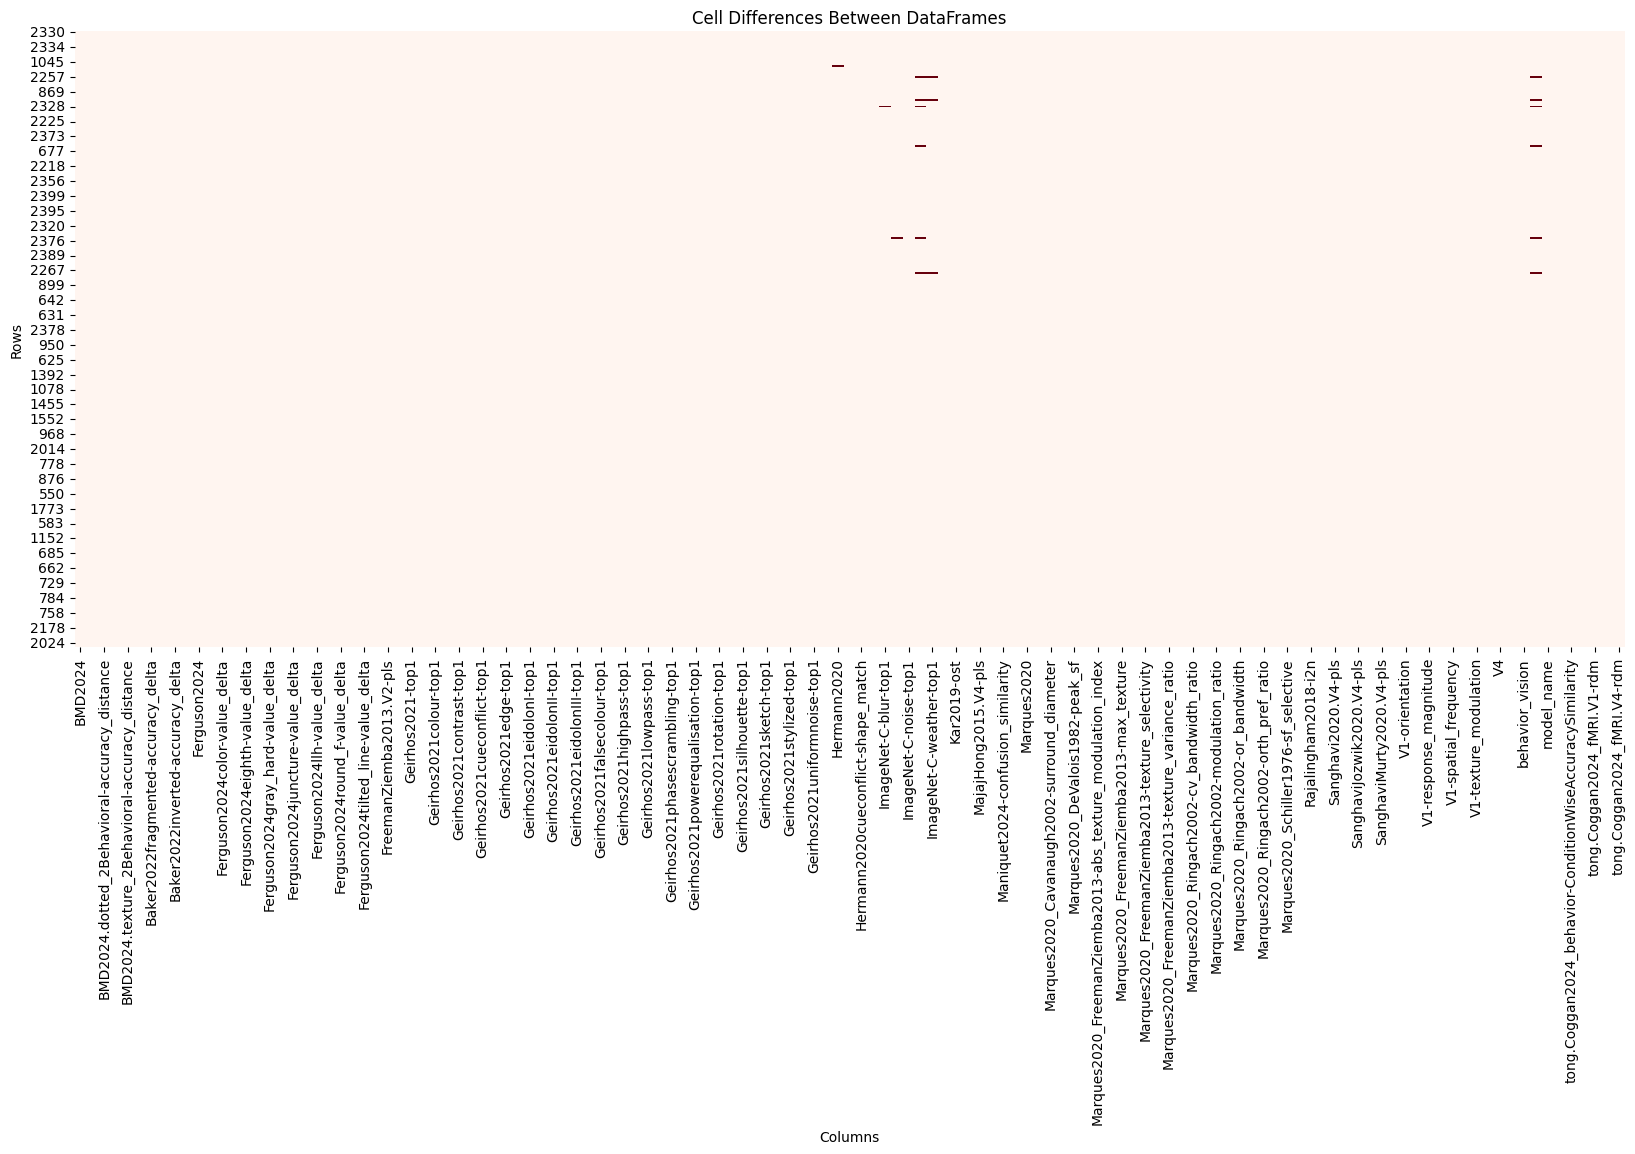

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.heatmap(diff.drop(columns=["rank"]), cbar=False, cmap='Reds')  # Red cells indicate differences
plt.title('Cell Differences Between DataFrames')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [22]:
error_cols = sum(diff.drop(columns=["rank"]).values.astype(int))
error_cols

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0])

In [23]:
diff.columns[np.where(error_cols > 0)]

Index(['Hermann2020', 'ImageNet-C-blur-top1', 'ImageNet-C-digital-top1',
       'ImageNet-C-top1', 'ImageNet-C-weather-top1', 'engineering_vision'],
      dtype='object')

### The above are problematic benchmarks. The child ImageNet benchmarks are the result of duplicate benchmark entries.

In [24]:
# First, normalize the missing values in both DataFrames
old_aligned_clean = old_sorted_cleaned.replace(['nan', 'NaN', 'X', '', 'None', np.nan], 'nan').drop(columns=["rank"])
new_aligned_clean = new_sorted_cleaned.replace(['nan', 'NaN', 'X', '', 'None', np.nan], 'nan').drop(columns=["rank"])

# Create a mask of where values are different, handling nan specially
diff_mask = pd.DataFrame(index=old_aligned_clean.index, columns=old_aligned_clean.columns)
for idx in old_aligned_clean.index:
    for col in old_aligned_clean.columns:
        old_val = old_aligned_clean.at[idx, col]
        new_val = new_aligned_clean.at[idx, col]
        # Consider nan values equal to each other
        if pd.isna(old_val) and pd.isna(new_val):
            diff_mask.at[idx, col] = False
        else:
            diff_mask.at[idx, col] = old_val != new_val

# Print only the actual differences
for idx in diff_mask.index:
    for col in diff_mask.columns:
        if diff_mask.at[idx, col]:
            old_val = old_aligned_clean.at[idx, col]
            new_val = new_aligned_clean.at[idx, col]
            print(f"model_id: {idx}, column: {col}")
            print(f"  old: {old_val} with type {type(old_val)}")
            print(f"  new: {new_val} with type {type(new_val)}")
            print("---")

model_id: 1033, column: Hermann2020
  old: 0.402 with type <class 'str'>
  new: 0.403 with type <class 'str'>
---
model_id: 2257, column: ImageNet-C-top1
  old: 0.417 with type <class 'str'>
  new: 0.521 with type <class 'str'>
---
model_id: 2257, column: ImageNet-C-weather-top1
  old: nan with type <class 'str'>
  new: 0.589 with type <class 'str'>
---
model_id: 2257, column: engineering_vision
  old: 0.405 with type <class 'str'>
  new: 0.426 with type <class 'str'>
---
model_id: 2383, column: ImageNet-C-top1
  old: 0.306 with type <class 'str'>
  new: 0.383 with type <class 'str'>
---
model_id: 2383, column: ImageNet-C-weather-top1
  old: nan with type <class 'str'>
  new: 0.453 with type <class 'str'>
---
model_id: 2383, column: engineering_vision
  old: 0.352 with type <class 'str'>
  new: 0.367 with type <class 'str'>
---
model_id: 2328, column: ImageNet-C-blur-top1
  old: nan with type <class 'str'>
  new: 0.34 with type <class 'str'>
---
model_id: 2328, column: ImageNet-C-top1
